#🔧 Step-by-Step: Clean & Prep for ML in Jupyter

### ✅ Step 1: Load the Data (No Headers)
##### I  exported from SSMS 21 via "Select Top 1000 Rows", the CSV probably doesn't include column headers.

In [1]:
import pandas as pd

# Load without headers
df = pd.read_csv(r"D:\Software\For Other\AI\Data Science\All_Notes\Projects Notes\Projects\SQL project Market analysis\superstore_cleaned.csv", header=None)

# Optional: check shape
print(df.shape)
df.head()


(1000, 26)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1826,1970,GRADUATION,DIVORCED,84835,0,0,2014-06-16,0,189,...,4,4,6,1,1,0,-7028.9916,2014,6,1190
1,1,1961,GRADUATION,SINGLE,57091,0,0,2014-06-15,0,464,...,7,3,7,5,1,0,-9794.4541,2014,6,577
2,10476,1958,GRADUATION,MARRIED,67267,0,1,2014-05-13,0,134,...,3,2,5,2,0,0,-26699.6016,2014,5,251
3,1386,1967,GRADUATION,TOGETHER,32474,1,1,2014-11-05,0,10,...,1,0,2,7,0,0,-295118.1818,2014,11,11
4,5371,1989,GRADUATION,SINGLE,21474,1,0,2014-08-04,0,6,...,3,1,2,7,1,0,-23497.8022,2014,8,91


### ✅ Step 2: Add Meaningful Column Names
##### assign Column Names manually. Based on Screenshot of Column Names image :

In [6]:
df.columns = [
    'Customer_ID', 'Birth_Year', 'Education', 'Marital_Status', 'Income',
    'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
    'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response'
]
df.head()

,Customer_ID,Birth_Year,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,1826,1970,GRADUATION,DIVORCED,84835,0,0,2014-06-16,0,189,...,4,4,6,1,1,0,-7028.9916,2014,6,1190
1,1,1961,GRADUATION,SINGLE,57091,0,0,2014-06-15,0,464,...,7,3,7,5,1,0,-9794.4541,2014,6,577
2,10476,1958,GRADUATION,MARRIED,67267,0,1,2014-05-13,0,134,...,3,2,5,2,0,0,-26699.6016,2014,5,251
3,1386,1967,GRADUATION,TOGETHER,32474,1,1,2014-11-05,0,10,...,1,0,2,7,0,0,-295118.1818,2014,11,11
4,5371,1989,GRADUATION,SINGLE,21474,1,0,2014-08-04,0,6,...,3,1,2,7,1,0,-23497.8022,2014,8,91


### ✅ Step 3: Convert Date Column to datetime

In [34]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

### ✅ Step 4: Handle Missing or Negative Income


In [13]:
# Replace negative income with NaN and drop them

df['Income'] = df['Income'].apply(lambda x: x if x > 0 else None)
df.dropna(subset=['Income'], inplace=True)


### 🔢 PART 1: Linear Regression
##### 🎯 Predict income using other features

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
for col in ['Education', 'Marital_Status']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Features and target
X = df[['Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
        'NumStorePurchases', 'NumWebVisitsMonth', 'Education', 'Marital_Status']]
y = df['Income']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
lr = LinearRegression()
lr.fit(X_train, y_train)

print("R^2 Score:", lr.score(X_test, y_test))


R^2 Score: 0.127186987101495


### 📊 PART 2: KMeans Clustering
#### 🎯 Group customers based on spending behavior

In [21]:
import os
os.environ["OMP_NUM_THREADS"] = "4"

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

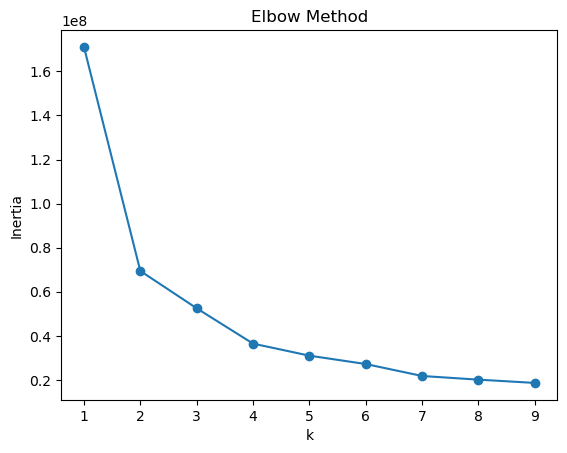

,Cluster,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,189,104,379,111,189,218
1,0,464,5,64,7,0,37
2,0,134,11,59,15,2,30
3,0,10,0,1,0,0,0
4,0,6,16,24,11,0,34


In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cluster only on spend amounts
X_kmeans = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
               'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Elbow method to find best k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_kmeans)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

# Fit with chosen k
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_kmeans)

df[['Cluster'] + X_kmeans.columns.tolist()].head()


### 📈 PART 3: ARIMA (Time Series)
#### 🎯 Forecast overall wine spending over time


In [26]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

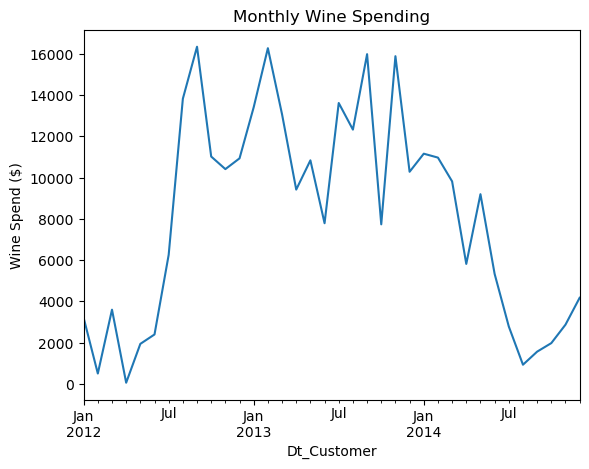

Next 6 months forecast:
2015-01-31    4212.502920
2015-02-28    4183.527214
2015-03-31    4209.358479
2015-04-30    4186.330421
2015-05-31    4206.859476
2015-06-30    4188.558232
Freq: ME, Name: predicted_mean, dtype: float64


In [30]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Group by date and sum wine spending, resample monthly with 'ME'
df_ts = df.groupby('Dt_Customer')['MntWines'].sum().resample('ME').sum()

# Plot
df_ts.plot(title='Monthly Wine Spending')
plt.ylabel("Wine Spend ($)")
plt.show()

# ARIMA Modeling
model = ARIMA(df_ts, order=(1,1,1))  # (p,d,q)
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)

print("Next 6 months forecast:")
print(forecast)